In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# from google.colab.patches import cv2_imshow

%matplotlib inline

In [2]:
img = cv2.imread(filename = 'images/sudheer.jpeg', flags = cv2.IMREAD_COLOR)
print(f'Shape: {img.shape}\nData type:{img.dtype}')

Shape: (1771, 1438, 3)
Data type:uint8


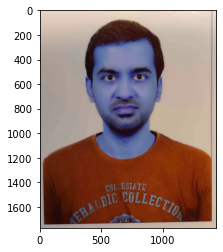

In [3]:
# Color space mismatch, matplotlib is expecting RGB,
# but cv2 reads in BGR by default
plt.imshow(img)

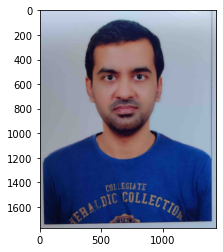

In [4]:
# Corrected plot
img_rgb = cv2.cvtColor(src = img, code = cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb);

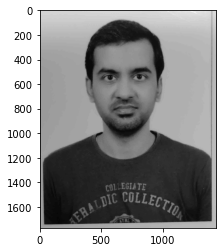

In [5]:
# Plotting a grayscale image
# Using grayscale colormap
plt.imshow(cv2.cvtColor(src = img, code = cv2.COLOR_BGR2GRAY), cmap = 'gray')

In [15]:
# Saving grayscale image
cv2.imwrite('images/sudheer-gray.jpg', cv2.cvtColor(src = img, code = cv2.COLOR_BGR2GRAY))

True

original dim:[1438, 1771]
resized dim:[719, 885]


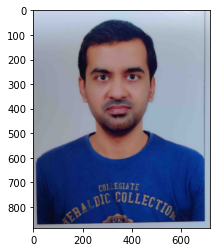

In [7]:
# Image resize
ratio = .5 
orig_dim = [img_rgb.shape[1], img_rgb.shape[0]]
resize_dim = [int(x*ratio) for x in orig_dim]
print(f'original dim:{orig_dim}')
print(f'resized dim:{resize_dim}')

img_resized = cv2.resize(src=img_rgb, dsize=tuple(resize_dim))
plt.imshow(img_resized)

(106, 74, 3)


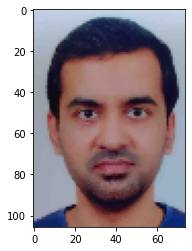

In [8]:
# Image crop
ratio = .2
x_start, x_end = 20, 550
y_start, y_end = 150, 520
# Cropping to keep mugshot
img_cropped = img_resized[x_start:x_end, y_start:y_end]
# Resizing to be able superimpose on top of MAHE image.
img_cropped = cv2.resize(src=img_cropped,
                dsize=(int((y_end-y_start)*ratio),int((x_end-x_start)*ratio)))
print(img_cropped.shape)
plt.imshow(img_cropped)

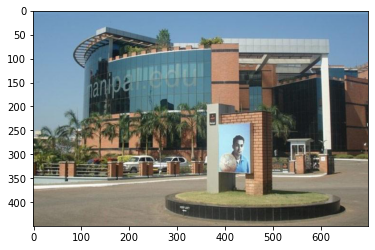

In [9]:
background = cv2.imread('images/Manipal.jpeg', cv2.IMREAD_COLOR)
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
plt.imshow(background)

In [10]:
background.shape

(450, 700, 3)

In [11]:
# https://docs.opencv.org/3.4/d5/dc4/tutorial_adding_images.html
def alpha_controlled_overlay(overlay):
  alpha = .2
  beta = 1. - alpha
  overlay = cv2.addWeighted(
    background[x_offset:x_offset+rows, y_offset:y_offset+cols], alpha, overlay, beta, .0)
  return overlay

In [12]:
overlay = img_cropped
rows,cols,channels = overlay.shape
x_offset = 240
y_offset = 380

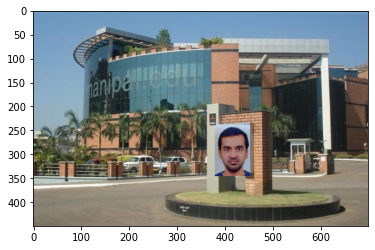

In [13]:
bg_copy1 = np.copy(background)
# Overwrite pixels @ overlay position 
bg_copy1[x_offset:x_offset+rows, y_offset:y_offset+cols ] = overlay
plt.imshow(bg_copy1)

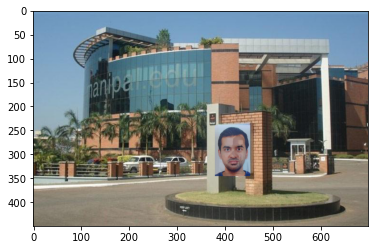

In [14]:
bg_copy2 = np.copy(background)
# Super impose with alpha control - Optional  
overlay = alpha_controlled_overlay(overlay)
# Overwrite pixels @ overlay position 
bg_copy2[x_offset:x_offset+rows, y_offset:y_offset+cols ] = overlay
plt.imshow(bg_copy2)